In [1]:
import netCDF4
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
import pandas as pd

In [2]:
def anu(var):
    return var.groupby('time.year').mean(dim='time')

# file paths
filesethistorical = '[regridded TOS historical file]'

## Loading and viewing the SST data. Setting lat and lon.

HistoricalSSTData = xr.open_dataset(filesethistorical)

lat = HistoricalSSTData.lat
lon = HistoricalSSTData.lon

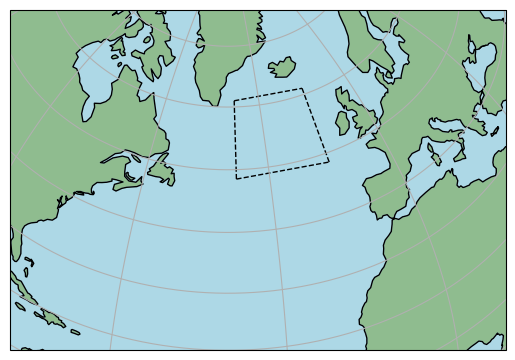

In [36]:
def sample_data():

    crs = ccrs.RotatedPole(pole_longitude=180)
    
    x = lon
    y = lat

    return x, y, crs


def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_latitude=50,central_longitude=320))

    ax.set_global()
    ax.gridlines()

     # Plotting land
    ax.add_feature(cfeature.LAND, color='darkseagreen', edgecolor='black', zorder=0)

    # Plotting ocean
    ax.add_feature(cfeature.OCEAN, color='lightblue', edgecolor='black', zorder=1)

    plt.plot([-38,-38],[48.5,61],linewidth=1, transform=ccrs.PlateCarree(), color='k', linestyle = 'dashed')
    plt.plot([-15,-15],[48.5,61],linewidth=1, transform=ccrs.PlateCarree(), color='k', linestyle = 'dashed')
    plt.plot([-38,-15],[48.5,48.5],linewidth=1, transform=ccrs.PlateCarree(), color='k', linestyle = 'dashed')
    plt.plot([-38,-15],[61,61],linewidth=1, transform=ccrs.PlateCarree(), color='k', linestyle = 'dashed')
    plt.rcParams.update({'font.family':'sans-serif'})
    plt.rcParams.update({'font.sans-serif':'Arial'})

    ax.add_feature(cfeature.COASTLINE,lw=1,zorder=1.2)
    ax.set_extent((-80,15,20,69), crs = ccrs.PlateCarree())

    fig_name = 'NAWH Map'
    fig_dir = '[OUTPUT PATH]'
    plt.savefig(fig_dir + fig_name, dpi=600, facecolor='white', transparent=False) 
    plt.show()

if __name__ == '__main__':
    main()